In [12]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
import time

In [2]:
# API key
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=25)
lngs = np.random.uniform(low=-180.000, high=180.000, size=25)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

24

In [7]:
# Empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count    
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | atar
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | keuruu
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | b

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,64.38,82,0,17.27,MR,2021-05-28 02:44:50
1,Albany,42.6001,-73.9662,55.98,62,99,5.10,US,2021-05-28 02:44:50
2,Cherskiy,68.7500,161.3000,59.67,30,100,20.62,RU,2021-05-28 02:44:50
3,Port Lincoln,-34.7333,135.8667,61.77,57,97,9.64,AU,2021-05-28 02:44:50
4,Dunedin,-45.8742,170.5036,47.80,83,100,8.99,NZ,2021-05-28 02:44:51
5,Cidreira,-30.1811,-50.2056,61.21,79,1,11.48,BR,2021-05-28 02:40:35
6,Chokurdakh,70.6333,147.9167,46.13,54,100,11.48,RU,2021-05-28 02:39:58
7,Busselton,-33.6500,115.3333,72.05,58,1,14.81,AU,2021-05-28 02:44:51
8,Ushuaia,-54.8000,-68.3000,28.06,100,75,18.41,AR,2021-05-28 02:41:27
9,Jamestown,42.0970,-79.2353,56.52,70,1,4.00,US,2021-05-28 02:44:51


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2021-05-28 02:44:50,20.9310,-17.0347,64.38,82,0,17.27
1,Albany,US,2021-05-28 02:44:50,42.6001,-73.9662,55.98,62,99,5.10
2,Cherskiy,RU,2021-05-28 02:44:50,68.7500,161.3000,59.67,30,100,20.62
3,Port Lincoln,AU,2021-05-28 02:44:50,-34.7333,135.8667,61.77,57,97,9.64
4,Dunedin,NZ,2021-05-28 02:44:51,-45.8742,170.5036,47.80,83,100,8.99


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_new_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

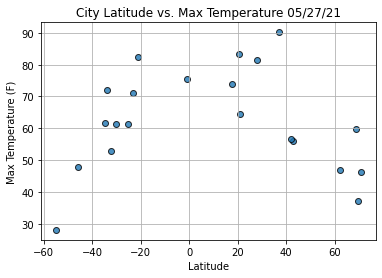

In [13]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

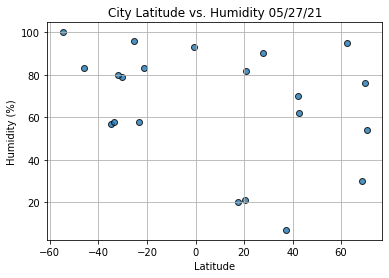

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

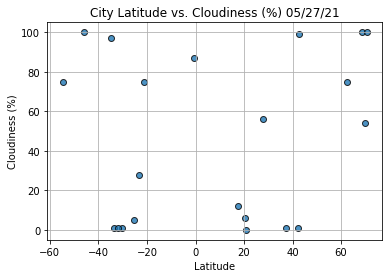

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

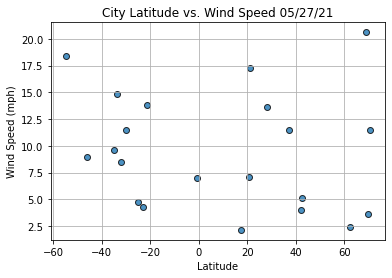

In [16]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()